# Popular Machine Learning Methods

## Association Rules, KNN, Decision Trees, Bayesian Methods, Ensemble Learning, and Neural Networks

### Popular Machine Learning Methods

### Learning Objectives:
By the end of this week, students will be able to:

1. Understand association rules and apply the Apriori algorithm.
2. Implement instance-based learning with K-Nearest Neighbors (KNN).
3. Learn decision trees with CART.
4. Explore Bayesian statistics with Naive Bayes.
5. Apply ensemble learning using random forests.
6. Build a simple neural network using perceptrons.
7. Understand the basic concepts of neural networks and build a simple neural network model.

### Association Rules with Apriori Algorithm

Association rules leaaring is a rule-based machine learning method for discovering relationships between variables in large datasets. The Apriori algorithm is a popular algorithm used to mine association rules. The algorithm uses a breadth-first search strategy to count the support of itemsets and generate frequent itemsets. The algorithm is based on the following principles:

1. If an itemset is frequent, then all of its subsets must also be frequent.
2. If an itemset is infrequent, then all of its supersets must also be infrequent.

The Apriori algorithm has three main steps:

1. Generate frequent itemsets.
2. Generate association rules.
3. Evaluate the rules.

The Apriori algorithm is used in market basket analysis, where the goal is to identify relationships between items in a transaction dataset. The algorithm is also used in recommendation systems, where the goal is to recommend items to users based on their preferences. The algorithm is also used in web mining, where the goal is to identify patterns in web usage data. 

#### Three ways to measure association rules:

1. Support: The support of an itemset is the proportion of transactions in the dataset that contain the itemset. The support of an itemset is calculated as the number of transactions containing the itemset divided by the total number of transactions in the dataset.

2. Confidence: The confidence of a rule is the proportion of transactions containing the antecedent that also contain the consequent. The confidence of a rule is calculated as the number of transactions containing both the antecedent and the consequent divided by the number of transactions containing the antecedent. If confidence is greater than 0.5, then the rule is considered strong. If confidence is less than 0.5, then the rule is considered weak. If confidence is equal to 0.5, then the rule is considered neutral.

3. Lift: The lift of a rule is the ratio of the observed support to the expected support. The lift of a rule is calculated as the support of the rule divided by the product of the support of the antecedent and the support of the consequent.

pip install mlxtend



In [2]:
# Example of Apriori Algorithm using mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd



In [5]:
# Simulated dataset (e.g., basket analysis)
# Each row represents a transaction
# Each column represents an item
# 1 indicates that the item is in the transaction
data = {'bread': [1, 1, 1, 0, 0],
        'milk': [1, 1, 0, 1, 1],
        'butter': [0, 1, 1, 1, 0]}

baskets_sets = pd.DataFrame(data)

baskets_sets.head()


,bread,milk,butter
0,1,1,0
1,1,1,1
2,1,0,1
3,0,1,1
4,0,1,0


In [6]:
baskets_sets_bool = baskets_sets.astype(bool)
baskets_sets_bool.head()

,bread,milk,butter
0,True,True,False
1,True,True,True
2,True,False,True
3,False,True,True
4,False,True,False


In [7]:
# Applying Apriori algorithm
apriori(baskets_sets_bool, min_support=0.6)

,support,itemsets
0,0.6,(0)
1,0.8,(1)
2,0.6,(2)


In [8]:
# Applying Apriori algorithm with column names
# use_colnames=True returns the column names of the items instead of column indices
# This makes the output more readable
apriori(baskets_sets_bool, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.6,(bread)
1,0.8,(milk)
2,0.6,(butter)


In [9]:
# Applying Apriori algorithm with column names and minimum length of itemsets
# min_len=2 returns itemsets of length 2 or more
# This can be useful to find associations between multiple items
# For example, if a customer buys bread and milk, they are likely to buy butter
# This is because butter is often used with bread and milk
# Therefore, the association between bread and milk can be used to recommend butter
# This is a simple example, but it can be useful in practice
# For example, if a customer buys a camera, they are likely to buy a memory card
# This is because a camera requires a memory card to store photos
# Therefore, the association between a camera and a memory card can be used to recommend a memory card

df_combo = baskets_sets_bool.copy()
frequent_itemsets = apriori(df_combo, min_support=0.006, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(bread),1
1,0.8,(milk),1
2,0.6,(butter),1
3,0.4,"(milk, bread)",2
4,0.4,"(butter, bread)",2
5,0.4,"(butter, milk)",2
6,0.2,"(butter, milk, bread)",3


In [12]:
frequent_itemsets[ (frequent_itemsets['length'] >= 2) & (frequent_itemsets['support'] >= 0.006) ]

,support,itemsets,length
3,0.4,"(milk, bread)",2
4,0.4,"(butter, bread)",2
5,0.4,"(butter, milk)",2
6,0.2,"(butter, milk, bread)",3


In [17]:
# Applying Apriori algorithm with column names and minimum length of itemsets
# min_len=2 returns itemsets of length 2 or more
# This can be useful to find associations between multiple items
# For example, if a customer buys bread and milk, they are likely to buy butter
# This is because butter is often used with bread and milk
# Therefore, the association between bread and milk can be used to recommend butter
# This is a simple example, but it can be useful in practice
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.06)

# Display the association rules
print(rules)

        antecedents      consequents  antecedent support  consequent support  \
0            (milk)          (bread)                 0.8                 0.6   
1           (bread)           (milk)                 0.6                 0.8   
2          (butter)          (bread)                 0.6                 0.6   
3           (bread)         (butter)                 0.6                 0.6   
4          (butter)           (milk)                 0.6                 0.8   
5            (milk)         (butter)                 0.8                 0.6   
6    (butter, milk)          (bread)                 0.4                 0.6   
7   (butter, bread)           (milk)                 0.4                 0.8   
8     (milk, bread)         (butter)                 0.4                 0.6   
9          (butter)    (milk, bread)                 0.6                 0.4   
10           (milk)  (butter, bread)                 0.8                 0.4   
11          (bread)   (butter, milk)    

In [19]:
# The lift metric measures the ratio of the observed support to that expected if X and Y were independent
# A lift value greater than 1 indicates that the itemset is likely to be purchased together
# A lift value less than 1 indicates that the itemset is unlikely to be purchased together
# A lift value equal to 1 indicates that the itemset is independent
# Therefore, a lift value greater than 1 is desirable
# The minimum threshold is set to 1 to display all the rules
# The rules are sorted by lift in descending order


rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0    (butter)     (bread)                 0.6                 0.6      0.4   
1     (bread)    (butter)                 0.6                 0.6      0.4   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.666667  1.111111      0.04         1.2           0.25  
1    0.666667  1.111111      0.04         1.2           0.25  


In [22]:
rules[(rules['lift']>1) & (rules['confidence']>0.6)]   # filter rules with lift > 1 and confidence > 0.6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(butter),(bread),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
1,(bread),(butter),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25


#### Question:
Based on the rules generated, which products are most likely to be bought together?

### Instance-based Learning with K-Nearest Neighbors (KNN)   

A supervised classifier that memorizes observations from within a dataset and classifies new observations based on their similarity to the memorized observations. The KNN algorithm is based on the following principles:

1. The KNN algorithm is a non-parametric method that does not make any assumptions about the underlying distribution of the data.
2. The KNN algorithm is a lazy learner that does not learn a model from the data but instead memorizes the data and classifies new observations based on their similarity to the memorized data.
3. The KNN algorithm is a simple and intuitive algorithm that is easy to understand and implement.

#### K-Nearest Neighbors Use Cases

1. Stock Market Prediction: Predicting the price of a stock based on the prices of other stocks.
2. Image Recognition: Classifying images based on their similarity to other images.
3. Credit Scoring: Predicting the creditworthiness of a borrower based on the credit scores of other borrowers.
4. Customer Segmentation: Segmenting customers based on their similarity to other customers.
5. Anomaly Detection: Detecting anomalies in data based on their similarity to other data points.

#### K-Nearest Neighbors Assumptions

1. The KNN algorithm assumes that the data is continuous and that the features are independent.
2. The KNN algorithm assumes that the data is evenly distributed and that the classes are balanced.
3. The KNN algorithm assumes that the data is normalized and that the features are scaled.




In [23]:
# KNN Classification Example
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, preprocessing
from sklearn import metrics

In [24]:
address = 'data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

In [25]:
X = cars[['mpg','disp','hp','wt']].values

y = cars.iloc[:,(9)].values

In [26]:
# Scale the data
X = preprocessing.scale(X)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [28]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = clf.predict(x_test)
y_expect = y_test
print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



#### Interpretation:
Recall is a measure of your model performance. It is the ratio of correctly predicted positive observations to the all observations in actual class. The question is, how many of the actual positives our model capture through labeling it as positive (True Positive). Recall is also known as Sensitivity or True Positive Rate.

Of all the points that were labeled 1, only 67% of the results returned were truly relevant. This is a good measure of the model's completeness.

Of the entire dataset, 86% of the results that were returned were relevant. This is a good measure of the model's accuracy.

#### Question:
Experiment with different values of $k$ (n_neighbors) in KNN and observe the impact on accuracy.

### Decision Trees with CART

A decision tree is a tree-like model of decisions and their possible consequences. The model is used to predict the value of a target variable based on several input variables. The model is based on the following principles:

1. The decision tree is a supervised learning algorithm that is used for classification and regression tasks.
2. The decision tree is a non-parametric method that does not make any assumptions about the underlying distribution of the data.
3. The decision tree is a simple and intuitive algorithm that is easy to understand and interpret.

#### Decision Trees Have Three Types of Nodes:

1. Root Node: The top node of the tree that represents the target variable.
2. Internal Node: A node that represents a decision based on an input variable.
3. Leaf Node: A node that represents the outcome of a decision.

#### Decision Trees Use Cases

1. Credit Scoring: Predicting the creditworthiness of a borrower based on their credit history.
2. Customer Segmentation: Segmenting customers based on their demographic and behavioral characteristics.
3. Fraud Detection: Detecting fraudulent transactions based on their characteristics.
4. Medical Diagnosis: Diagnosing diseases based on the symptoms of patients.
5. Marketing Campaigns: Predicting the success of marketing campaigns based on the characteristics of customers.

#### Decision Trees Assumptions

1. The decision tree assumes that the data is continuous and that the features are independent.
2. The decision tree assumes that the data is evenly distributed and that the classes are balanced.
3. The decision tree assumes that the data is normalized and that the features are scaled.

#### Two Types of Decision Trees:

1. Classification Trees: A decision tree that is used for classification tasks.
2. Regression Trees: A decision tree that is used for regression tasks.

#### How Decision Trees Work:

1. The decision tree is built by recursively splitting the data into subsets based on the input variables.
2. The decision tree is pruned to prevent overfitting and improve generalization.
3. The decision tree is used to predict the value of the target variable based on the input variables.

#### How Recursive Binary Splitting Works:

1. At every node, the decision tree splits the data into two subsets based on a threshold value.
2. In regression trees: use the SSE (Sum of Squared Errors) to find the best split.
3. In classification trees: use the Gini Index or Entropy (to calculate the loss function) to find the best split.

#### Disadvantages of Decision Trees:

1. Decision trees are prone to overfitting and can be sensitive to noise in the data.
2. Decision trees can be biased towards the classes that are more frequent in the data.
3. Decision trees can be computationally expensive to build and evaluate.








In [30]:
# Decision Tree Example using CART
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [31]:
# Initialize Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

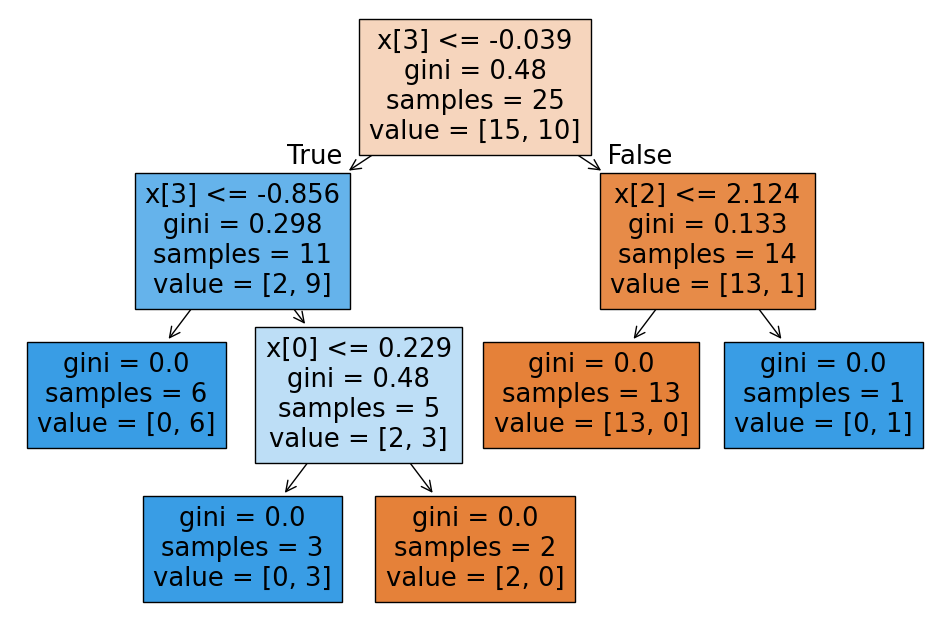

In [32]:
# Plot the tree
# samples: number of samples in the node
# value: number of samples in the node per class label (e.g., 0 and 1) 
# class: class label (e.g., 0 or 1)
# gini: Gini impurity (0: pure, 0.5: impure)
# The tree is plotted from the top to the bottom
# The root node is at the top
# The leaf nodes are at the bottom
# The tree is split based on the feature that reduces the Gini impurity the most
# The tree is split until the maximum depth is reached or the Gini impurity is 0


plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True)
plt.show()

In [34]:
# Predict and calculate accuracy
y_pred = clf.predict(x_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



Explain how the decision tree splits the data and compare its performance with KNN.

### Bayesian Methods with Naive Bayes

A probabilistic classifier that is based on Bayes' theorem and assumes that the features are independent. The Naive Bayes algorithm is based on the following principles:

1. The Naive Bayes algorithm is a supervised classifier that is used for classification tasks.
2. The Naive Bayes algorithm is a probabilistic method that is based on Bayes' theorem.
3. The Naive Bayes algorithm is a simple and intuitive algorithm that is easy to understand and implement.


#### Conditional Probability

The conditional probability of an event A given an event B is the probability of event A occurring given that event B has occurred. The conditional probability of an event A given an event B is calculated as the probability of event A and event B occurring divided by the probability of event B occurring.

#### Bayes' Theorem

Bayes' theorem is a fundamental theorem in probability theory that describes the relationship between the conditional probability of an event A given an event B and the conditional probability of an event B given an event A. Bayes' theorem is used to update the probability of an event based on new evidence.

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

#### Types of Naive Bayes Classifiers

1. Gaussian Naive Bayes: A Naive Bayes classifier that is used for continuous data.
2. Multinomial Naive Bayes: A Naive Bayes classifier that is used for discrete data.
3. Bernoulli Naive Bayes: A Naive Bayes classifier that is used for binary data.


#### Naive Bayes Use Cases

1. Email Spam Detection: Classifying emails as spam or not spam based on their content.
2. Document Classification: Classifying documents into categories based on their content.
3. Sentiment Analysis: Classifying text as positive or negative based on its sentiment.
4. Medical Diagnosis: Diagnosing diseases based on the symptoms of patients.
5. Customer Segmentation: Segmenting customers based on their demographic and behavioral characteristics.

#### Naive Bayes Assumptions

1. The Naive Bayes algorithm assumes that the features are independent and that the data is continuous.
2. The Naive Bayes algorithm assumes that the data is evenly distributed and that the classes are balanced.
3. The Naive Bayes algorithm assumes that the data is normalized and that the features are scaled.

#### How Naive Bayes Works

1. The Naive Bayes algorithm calculates the probability of each class based on the input features.
2. The Naive Bayes algorithm predicts the class with the highest probability as the output.
3. The Naive Bayes algorithm is trained on the data using the maximum likelihood estimation.

#### Advantages of Naive Bayes

1. Naive Bayes is a simple and intuitive algorithm that is easy to understand and implement.
2. Naive Bayes is a probabilistic method that is based on Bayes' theorem and is well-suited for classification tasks.
3. Naive Bayes is a fast and efficient algorithm that is computationally inexpensive to build and evaluate.

#### Disadvantages of Naive Bayes

1. Naive Bayes assumes that the features are independent and can be sensitive to correlated features.
2. Naive Bayes assumes that the data is continuous and can be sensitive to outliers in the data.
3. Naive Bayes assumes that the data is evenly distributed and can be biased towards the classes that are more frequent in the data.







In [40]:
# Naive Bayes Classification
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [37]:
# The spam dataset comes from University of California Irvine. 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

import urllib.request

raw_data = urllib.request.urlopen(url)

dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [38]:
x = dataset[:,0:48]
y = dataset[:,-1]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)


In [41]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(x_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(x_test)

print(accuracy_score(y_expect, y_pred))

0.8577633007600435


In [42]:
MultiNB = MultinomialNB()
MultiNB.fit(x_train, y_train)

y_expect = y_test
y_pred = MultiNB.predict(x_test)

print(accuracy_score(y_expect, y_pred))

0.8816503800217155


In [43]:
GausNB = GaussianNB()
GausNB.fit(x_train, y_train)

y_expect = y_test
y_pred = GausNB.predict(x_test)

print(accuracy_score(y_expect, y_pred))

0.8197611292073833


In [44]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(x_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(x_test)

print(accuracy_score(y_expect, y_pred))

0.9109663409337676


### Ensemble Learning with Random Forests

An ensemble learning method that combines multiple decision trees to improve the performance of the model. The Random Forest algorithm is based on the following principles:

1. The Random Forest algorithm is an ensemble learning method that is used for classification and regression tasks.
2. The Random Forest algorithm is a bagging method that combines multiple decision trees to improve the performance of the model.
3. The Random Forest algorithm is a simple and intuitive algorithm that is easy to understand and implement.

#### Types of Ensemble Learning Methods

1. **Bagging**: A method that combines multiple models by training each model on a random subset of the data.
2. Boosting: A method that combines multiple models by training each model on the errors of the previous models.
3. Stacking: A method that combines multiple models by training a meta-model on the predictions of the base models.
4. Majority Voting: A method that combines multiple models by taking the majority vote of the predictions of the base models.
5. Averaging: A method that combines multiple models by taking the average of the predictions of the base models.

The bagging method takes results from multiple models and combines them to improve the overall performance of the model. The Random Forest algorithm is a bagging method that combines multiple decision trees to improve the performance of the model. Run the models in parallel and combine the results to improve the overall performance of the model.

#### Random Forest Use Cases

1. Credit Scoring: Predicting the creditworthiness of a borrower based on their credit history.
2. Customer Segmentation: Segmenting customers based on their demographic and behavioral characteristics.
3. Fraud Detection: Detecting fraudulent transactions based on their characteristics.
4. Medical Diagnosis: Diagnosing diseases based on the symptoms of patients.
5. Marketing Campaigns: Predicting the success of marketing campaigns based on the characteristics of customers.

#### Random Forest Assumptions

1. The Random Forest algorithm assumes that the data is continuous and that the features are independent.
2. The Random Forest algorithm assumes that the data is evenly distributed and that the classes are balanced.
3. The Random Forest algorithm assumes that the data is normalized and that the features are scaled.

#### How Random Forest Works

1. The Random Forest algorithm builds multiple decision trees by sampling the data with replacement.
2. The Random Forest algorithm combines the predictions of the decision trees to make the final prediction.
3. The Random Forest algorithm is trained on the data using the maximum likelihood estimation.

#### Advantages of Random Forest

1. Random Forest is an ensemble learning method that combines multiple decision trees to improve the performance of the model.
2. Random Forest is a bagging method that runs multiple models in parallel and combines the results to improve the overall performance of the model.
3. Random Forest is a simple and intuitive algorithm that is easy to understand and implement.

#### Disadvantages of Random Forest

1. Random Forest is prone to overfitting and can be sensitive to noise in the data.
2. Random Forest can be computationally expensive to build and evaluate.
3. Random Forest can be biased towards the classes that are more frequent in the data.





#### Ensemble methods with random forest
This is a classification problem, where in we will be estimating the species label for iris flowers.

In [46]:
import sklearn.datasets as datasets
from sklearn.ensemble import RandomForestClassifier

In [47]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

In [48]:
y.columns = ['labels']

print(df.head())
y[0:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,labels
0,0
1,0
2,0
3,0
4,0


The data set contains information on the:

- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)
- species type

In [49]:
df.isnull().any()==True

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [50]:
print(y.labels.value_counts())

labels
0    50
1    50
2    50
Name: count, dtype: int64


In [51]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=17)


In [52]:
# n_estimators: number of trees in the forest
# random_state: seed used by the random number generator
# ravel(): returns a contiguous flattened array 
# contiguous: elements are stored in adjacent memory locations
# flattened: 1D array
# fit(): builds the forest
# predict(): predicts the class labels
# RandomForestClassifier is an ensemble method that fits multiple decision trees
# The class label is predicted by the majority vote of the decision trees

classifier = RandomForestClassifier(n_estimators=200, random_state=0)
y_train_array = np.ravel(y_train)
classifier.fit(x_train, y_train_array)
y_pred = classifier.predict(x_test)

In [53]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [54]:
y_test_array = np.ravel(y_test)
print(y_test_array)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]


In [55]:
print(y_pred)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]


What is the advantage of using a random forest compared to a single decision tree?

### Neural Networks with Perceptrons

A neural network is a network of interconnected nodes that are inspired by the structure of the human brain. The network is used to learn complex patterns in data and make predictions based on the learned patterns. The Perceptron algorithm is a simple neural network that is used for binary classification tasks. The algorithm is based on the following principles:

1. The Perceptron algorithm is a supervised classifier that is used for binary classification tasks.
2. The Perceptron algorithm is a simple neural network that is based on the structure of the human brain.
3. The Perceptron algorithm is a linear model that is used to learn the weights of the input features.

#### Perceptron Architecture

1. Input Layer: The input layer of the Perceptron algorithm consists of the input features.
2. Output Layer: The output layer of the Perceptron algorithm consists of the output neuron.
3. Activation Function: The activation function of the Perceptron algorithm is used to make a prediction.

#### Perceptron Activation Function

1. The Perceptron algorithm uses the step function as the activation function to make a binary prediction.
2. The step function is a threshold function that outputs 1 if the weighted sum of the input features is greater than a threshold value and 0 otherwise.
3. The step function is a simple and intuitive function that is used to make a binary prediction.

#### Single Layer Neural Networks

1. The Perceptron algorithm is a single-layer neural network that consists of an input layer and an output layer.
2. The Perceptron algorithm is a linear model that is used to learn the weights of the input features.

[![Perceptron](images/Perceptron.PNG)](https://buse-koseoglu13.medium.com/one-layer-neural-network-from-scratch-classification-b6c71481f992)


#### Perceptron Learning Rule

The Perceptron algorithm is trained using the Perceptron learning rule, which is based on the following principles:

1. The Perceptron learning rule updates the weights of the input features based on the error of the prediction.
2. The Perceptron learning rule is used to minimize the error of the prediction and improve the performance of the model.
3. The Perceptron learning rule is a simple and intuitive algorithm that is easy to understand and implement.

#### Activation Function

- Linear activation function: The linear activation function is used to make a continuous prediction.
- Logistic Sigmoid activation function: The sigmoid activation function is used to make a binary prediction.
- ReLU (rectified linear unit) activation function: The ReLU activation function is used to make a binary prediction.
- Softmax activation function: The softmax activation function is used to make a multi-class prediction.

#### Perceptron Use Cases

1. Email Spam Detection: Classifying emails as spam or not spam based on their content.
2. Document Classification: Classifying documents into categories based on their content.
3. Sentiment Analysis: Classifying text as positive or negative based on its sentiment.
4. Medical Diagnosis: Diagnosing diseases based on the symptoms of patients.
5. Customer Segmentation: Segmenting customers based on their demographic and behavioral characteristics.

#### Perceptron Assumptions

1. The Perceptron algorithm assumes that the data is continuous and that the features are independent.
2. The Perceptron algorithm assumes that the data is evenly distributed and that the classes are balanced.
3. The Perceptron algorithm assumes that the data is normalized and that the features are scaled.

#### How Perceptrons Work

1. The Perceptron algorithm calculates the weighted sum of the input features and applies an activation function to make a prediction.
2. The Perceptron algorithm updates the weights of the input features based on the error of the prediction.
3. The Perceptron algorithm is trained on the data using the Perceptron learning rule.

#### Advantages of Perceptrons

1. Perceptrons are a simple and intuitive algorithm that is easy to understand and implement.
2. Perceptrons are a linear model that is used to learn the weights of the input features.
3. Perceptrons are a supervised classifier that is used for binary classification tasks.

#### Disadvantages of Perceptrons

1. Perceptrons are a linear model that is limited in its ability to learn complex patterns in data.
2. Perceptrons are a simple neural network that is prone to overfitting and can be sensitive to noise in the data.
3. Perceptrons are a binary classifier that is limited in its ability to classify multiple classes.



#### Neural network with a Perceptron
A perceptron is a basic neural network model that classifies input into two classes using a linear boundary.

In [56]:
from sklearn.linear_model import Perceptron

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from pandas import Series, DataFrame

In [57]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

x[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)


In [59]:
standardize = StandardScaler()

standardized_x_test = standardize.fit_transform(x_test)

standardized_x_train = standardize.fit_transform(x_train)

In [60]:
standardized_x_test[0:10,]

array([[-0.64325669,  2.16518556, -1.74844564, -1.31220275],
       [ 0.26132303, -0.34275138,  0.28118896,  0.20187735],
       [ 1.31666604, -0.09195769,  0.72517153,  1.30302651],
       [-0.19096683, -0.59354508,  0.02748464, -0.07340994],
       [ 0.5628496 , -0.59354508,  0.4714672 ,  0.61480828],
       [ 0.41208632, -0.09195769,  0.53489328,  0.61480828],
       [-0.64325669, -0.09195769,  0.28118896,  0.20187735],
       [ 2.82429891,  1.91439187,  1.67656274,  1.16538286],
       [-0.4924934 , -1.59671985, -0.16279361, -0.34869723],
       [-0.19096683, -1.34592616,  0.59831937,  0.89009557]])

In [61]:
# max_iter: number of epochs
# eta0: learning rate
# tol: tolerance
perceptron = Perceptron(max_iter=50, eta0=0.15, tol=1e-3, random_state=15)

perceptron.fit(standardized_x_train, y_train.ravel())

Perceptron(eta0=0.15, max_iter=50, random_state=15)

In [62]:
y_pred = perceptron.predict(standardized_x_test)

In [63]:
print(y_test)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]


In [64]:
print(y_pred)

[0 1 2 1 1 2 0 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 0 0 1 1 0 1]


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.80      0.73      0.76        11
           2       1.00      0.83      0.91        12

    accuracy                           0.83        30
   macro avg       0.83      0.85      0.83        30
weighted avg       0.86      0.83      0.84        30



In [66]:
print(confusion_matrix(y_test, y_pred))

[[ 7  0  0]
 [ 3  8  0]
 [ 0  2 10]]
